In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def collection (year_1, year_2, period):
    years_collection = {}
    for year in range(year_1, year_2, period):
        years_collection[year] = pd.read_csv(
        '/Users/yvdsd/SandBox/names/yob{}.txt'.format(year),
        names = ['Name', 'Gender', 'Count'])
    years_all = pd.concat(years_collection, names = ["Years", "Pos"])
    return years_all

## Задание 1

##### Построить график изменения количества имен Ruth и Robert с 1900 по 2000

In [3]:
years = collection(1900, 2001, 1)
Ruth_Robert = years.groupby([years.index.get_level_values(0), 'Name']).sum()\
.query('Name == ["Ruth", "Robert"]')

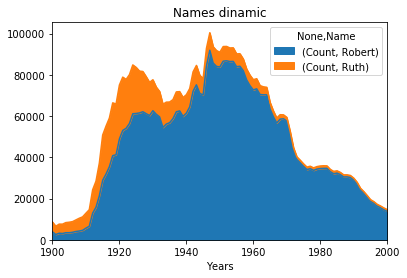

In [11]:
Ruth_Robert_chart = Ruth_Robert.unstack('Name')
Ruth_Robert_chart.plot.area(title= 'Names dinamic')

#### Задание 2

##### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

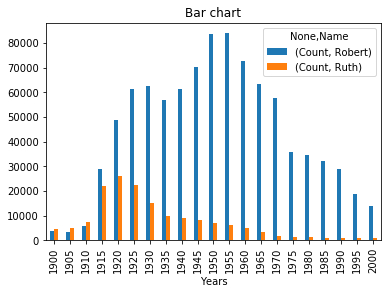

In [5]:
years_5 = collection(1900, 2001, 5)
Ruth_Robert_5 = years_5.groupby([years_5.index.get_level_values(0), 'Name']).sum()\
.query('Name == ["Ruth", "Robert"]')
Ruth_Robert_5.unstack('Name').plot.bar(title = 'Bar chart')

## Задание 3

##### Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [6]:
names_1950 = pd.read_csv('/Users/yvdsd/SandBox/names/yob1950.txt', 
                        names = ['Name', 'Gender', 'Count'],
                        index_col = False)

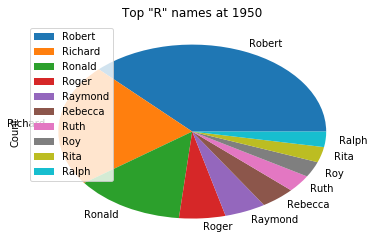

In [7]:
names_1950[names_1950.Name.str.startswith('R')].groupby('Name').sum()\
.sort_values(by='Count', ascending = False).head(10).plot.pie(y = 'Count', title = 'Top "R" names at 1950')

## Задание 4

##### Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [15]:
years = {}
for year in range(1900, 2001, 1):
    years[year] = pd.read_csv(
    '/Users/yvdsd/SandBox/names/yob{}.txt'.format(year),
    names = ['Name', 'Gender', 'Count'])
years_100 = pd.concat(years)

In [16]:
years_100_names = years_100.groupby(['Name'], as_index=False).sum()

In [18]:
years_100.head(5)

Name Gender  Count
1900 0      Mary      F  16706
     1     Helen      F   6343
     2      Anna      F   6114
     3  Margaret      F   5304
     4      Ruth      F   4765

In [20]:
# years_100_names['a'] = years_100_names.apply(lambda row: sum(['a'] in row.Name), axis=1)
years_100['Name_lower'] = years_100.apply(lambda row: row.Name.lower(), axis=1)

In [21]:
years_100

Name Gender  Count Name_lower
1900 0           Mary      F  16706       mary
     1          Helen      F   6343      helen
     2           Anna      F   6114       anna
     3       Margaret      F   5304   margaret
     4           Ruth      F   4765       ruth
     5      Elizabeth      F   4096  elizabeth
     6       Florence      F   3920   florence
     7          Ethel      F   3896      ethel
     8          Marie      F   3856      marie
     9        Lillian      F   3414    lillian
     10         Annie      F   3324      annie
     11          Edna      F   3102       edna
     12          Emma      F   3095       emma
     13         Alice      F   3059      alice
     14        Bessie      F   3044     bessie
     15        Bertha      F   3019     bertha
     16         Grace      F   2942      grace
     17          Rose      F   2845       rose
     18         Clara      F   2826      clara
     19       Mildred      F   2800    mildred
     20        Gladys      F   2733     gladys
     21        Minnie      F   2673     minnie
     22      Gertrude      F   2580   gertrude
     23         Pearl      F   2512      pearl
     24         Mabel      F   2509      mabel
     25       Frances      F   2495    frances
     26       Dorothy      F   2491    dorothy
     27        Martha      F   2437     martha
     28         Hazel      F   2425      hazel
     29           Ida      F   2285        ida
...               ...    ...    ...        ...
2000 29734      Youki      M      5      youki
     29735       Yuan      M      5       yuan
     29736       Yuji      M      5       yuji
     29737    Zabrien      M      5    zabrien
     29738     Zaccai      M      5     zaccai
     29739  Zaccheaus      M      5  zaccheaus
     29740  Zackeriah      M      5  zackeriah
     29741   Zackorie      M      5   zackorie
     29742      Zaeem      M      5      zaeem
     29743     Zaiden      M      5     zaiden
     29744       Zaim      M      5       zaim
     29745     Zakeem      M      5     zakeem
     29746      Zakia      M      5      zakia
     29747     Zakiah      M      5     zakiah
     29748     Zamari      M      5     zamari
     29749     Zamier      M      5     zamier
     29750      Zamon      M      5      zamon
     29751     Zanden      M      5     zanden
     29752      Zarak      M      5      zarak
     29753    Zayveon      M      5    zayveon
     29754       Zeev      M      5       zeev
     29755     Zefram      M      5     zefram
     29756     Zekiel      M      5     zekiel
     29757      Zelig      M      5      zelig
     29758      Zemar      M      5      zemar
     29759       Zeph      M      5       zeph
     29760      Zeven      M      5      zeven
     29761      Ziggy      M      5      ziggy
     29762         Zo      M      5         zo
     29763      Zyier      M      5      zyier

[1310187 rows x 4 columns]

In [22]:
x = ['bcdfghjklmnpqrstvwxz']
for name in years_100['Name_lower']:


mary
helen
anna
margaret
ruth
elizabeth
florence
ethel
marie
lillian
annie
edna
emma
alice
bessie
bertha
grace
rose
clara
mildred
gladys
minnie
gertrude
pearl
mabel
frances
dorothy
martha
hazel
ida
irene
myrtle
eva
catherine
louise
edith
sarah
elsie
esther
lillie
agnes
ella
nellie
mattie
laura
julia
josephine
carrie
viola
hattie
ruby
lena
jessie
mae
cora
beatrice
alma
willie
mamie
blanche
lucy
fannie
lula
jennie
katherine
marion
lucille
stella
rosa
evelyn
pauline
ada
thelma
virginia
maggie
vera
maude
beulah
dora
susie
daisy
ellen
nora
sadie
leona
marguerite
georgia
eleanor
effie
della
may
ann
kathryn
nettie
olive
bernice
lottie
sallie
nancy
betty
hilda
theresa
lizzie
lydia
emily
flora
katie
anne
violet
charlotte
marjorie
inez
ollie
lola
lois
rosie
doris
estelle
addie
alberta
loretta
lela
etta
mable
eunice
rebecca
goldie
jane
essie
henrietta
iva
jean
ora
harriet
caroline
nannie
sylvia
eula
mollie
opal
velma
genevieve
verna
susan
marian
amelia
lucile
victoria
madeline
maria
christine
viv

KeyboardInterrupt: 

In [178]:
list_1 = ['bcdfghjklmnpqrstvwxz']
years_100['Name_count'] = years_100.apply(lambda row: len(row.Name_lower), axis =1)
years_100

# sum(1 for t in text.lower() if t in CONS)


#     number_of_consonants = sum(x in consonants for x in name.lower())
#     names['Consonants Count'] = names.apply(lambda row: sum(x in consonants for x in row.Name.lower()), axis=1)

Count Name_lower  Name_count
1900 0      16706       mary           4
     1       6343      helen           5
     2       6114       anna           4
     3       5304   margaret           8
     4       4765       ruth           4
     5       4096  elizabeth           9
     6       3920   florence           8
     7       3896      ethel           5
     8       3856      marie           5
     9       3414    lillian           7
     10      3324      annie           5
     11      3102       edna           4
     12      3095       emma           4
     13      3059      alice           5
     14      3044     bessie           6
     15      3019     bertha           6
     16      2942      grace           5
     17      2845       rose           4
     18      2826      clara           5
     19      2800    mildred           7
     20      2733     gladys           6
     21      2673     minnie           6
     22      2580   gertrude           8
     23      2512      pearl           5
     24      2509      mabel           5
     25      2495    frances           7
     26      2491    dorothy           7
     27      2437     martha           6
     28      2425      hazel           5
     29      2285        ida           3
...           ...        ...         ...
2000 29734      5      youki           5
     29735      5       yuan           4
     29736      5       yuji           4
     29737      5    zabrien           7
     29738      5     zaccai           6
     29739      5  zaccheaus           9
     29740      5  zackeriah           9
     29741      5   zackorie           8
     29742      5      zaeem           5
     29743      5     zaiden           6
     29744      5       zaim           4
     29745      5     zakeem           6
     29746      5      zakia           5
     29747      5     zakiah           6
     29748      5     zamari           6
     29749      5     zamier           6
     29750      5      zamon           5
     29751      5     zanden           6
     29752      5      zarak           5
     29753      5    zayveon           7
     29754      5       zeev           4
     29755      5     zefram           6
     29756      5     zekiel           6
     29757      5      zelig           5
     29758      5      zemar           5
     29759      5       zeph           4
     29760      5      zeven           5
     29761      5      ziggy           5
     29762      5         zo           2
     29763      5      zyier           5

[1310187 rows x 3 columns]

In [195]:
test = [
    'aaaa',
    'bbbb',
    'cccc'
]
test_pd = pd.DataFrame(test)



TypeError: 'type' object is not subscriptable

In [185]:
def count_consonant(name):
    count = 0
    for ch in name():
        if ch in 'qwrtypsdfghjklzxcvbnm':
            count += 1
        else:
            pass
    return count
te

In [191]:
test_pd['Name_count'] = test_pd.apply(lambda row: count_consonant(row.a), axis=1)

AttributeError: ("'Series' object has no attribute 'a'", 'occurred at index 0')